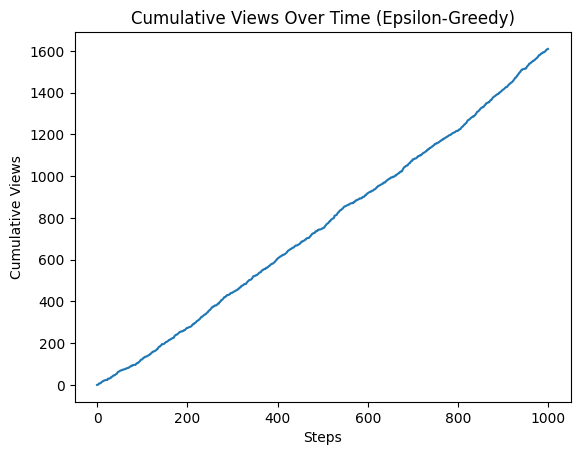

Total views for each article (arm): [  39.   10. 1287.   44.   55.   13.   25.   72.   26.   39.]
Number of times each article was selected: [ 33.  27. 680.  35.  41.  33.  24.  57.  35.  35.]
Epsilon value after training: 0.18384771238548175


In [2]:
import numpy as np
import matplotlib.pyplot as plt

class KArmBandit:
    def __init__(self, num_arms):
        self.num_arms = num_arms
        self.article_values = np.random.normal(loc=1.0, scale=0.5, size=num_arms)
        self.article_views = np.zeros(num_arms)
    
    def pull_arm(self, arm):
        view_count = np.random.poisson(lam=self.article_values[arm])
        self.article_views[arm] += view_count
        return view_count


class EpsilonGreedyAgent:
    def __init__(self, num_arms, epsilon=0.1, decay=0.99):
        self.num_arms = num_arms
        self.epsilon = epsilon
        self.decay = decay
        self.arm_counts = np.zeros(num_arms)
        self.total_views = np.zeros(num_arms)
    
    def select_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, self.num_arms)  
        else:
            return np.argmax(self.total_views / (self.arm_counts + 1e-10))  
    
    def update(self, chosen_arm, reward):
        self.arm_counts[chosen_arm] += 1
        self.total_views[chosen_arm] += reward
        self.epsilon *= self.decay  


def run_simulation(num_arms, num_steps, epsilon=0.5, decay=0.999):
    bandit = KArmBandit(num_arms)
    agent = EpsilonGreedyAgent(num_arms, epsilon, decay)
    rewards = []
    
    for step in range(num_steps):
        chosen_arm = agent.select_arm()
        reward = bandit.pull_arm(chosen_arm)
        agent.update(chosen_arm, reward)
        rewards.append(reward)
    
    return rewards, agent


num_arms = 10
num_steps = 1000
rewards, agent = run_simulation(num_arms, num_steps)

cumulative_rewards = np.cumsum(rewards)
plt.plot(cumulative_rewards)
plt.xlabel("Steps")
plt.ylabel("Cumulative Views")
plt.title("Cumulative Views Over Time (Epsilon-Greedy)")
plt.show()

print("Total views for each article (arm):", agent.total_views)
print("Number of times each article was selected:", agent.arm_counts)
print("Epsilon value after training:", agent.epsilon)